In [13]:
import random
import math
import matplotlib.pyplot as plt

In [14]:
# Point class with additional time attribute
class Point:
    def __init__(self, x, y, demand=0, travel_time={}):
        self.x = x
        self.y = y
        self.demand = demand
        self.visited = False
        self.travel_time = travel_time

In [15]:
# Distance function
def distance(p1, p2):
    return math.sqrt((p1.x - p2.x)**2 + (p1.y - p2.y)**2)

In [16]:
# Calculate travel time between two points
def get_travel_time(p1, p2):
    if p1.travel_time.get(p2) is None:
        # Add your logic here to calculate the actual travel time between points (e.g., Google Maps API)
        travel_time = random.uniform(0.5, 2.0)  # Example with random time
        p1.travel_time[p2] = travel_time
        p2.travel_time[p1] = travel_time
    return p1.travel_time[p2]

In [17]:
# Generate initial population of routes (random permutations)
def generate_population(points, population_size):
    population = []
    for _ in range(population_size):
        route = list(range(len(points)))
        random.shuffle(route)
        population.append(route)
    return population

In [18]:
# Calculate fitness of a route (total distance + weighted time)
def calculate_fitness(route, points, weight_distance=1.0, weight_time=0.5):
    total_distance = 0
    total_time = 0
    for i in range(len(route) - 1):
        p1 = points[route[i]]
        p2 = points[route[i + 1]]
        total_distance += distance(p1, p2)
        total_time += get_travel_time(p1, p2)
    return weight_distance * total_distance + weight_time * total_time

In [19]:
# Selection (tournament selection) considering combined fitness
def tournament_selection(population, fitness_scores, selection_size):
    selected_routes = []
    for _ in range(selection_size):
        competitors = random.sample(population, k=2)
        winner_index = min(range(len(competitors)), key=lambda i: fitness_scores[i])
        selected_routes.append(population[winner_index])
    return selected_routes

In [20]:
# Crossover (order crossover)
def order_crossover(route1, route2):
    crossover_point = random.randint(1, len(route1) - 1)
    remaining_elements1 = [i for i in route2 if i not in route1[:crossover_point]]
    offspring1 = route1[:crossover_point] + remaining_elements1
    remaining_elements2 = [i for i in route1 if i not in route2[:crossover_point]]
    offspring2 = route2[:crossover_point] + remaining_elements2
    return offspring1, offspring2

In [21]:
# Mutation (swap mutation)
def swap_mutation(route, mutation_rate):
    for i in range(len(route) - 1):
        if random.random() < mutation_rate:
            j = random.randint(i + 1, len(route) - 1)
            route[i], route[j] = route[j], route[i]
    return route

In [22]:
# Genetic algorithm for finding the shortest route considering both distance and time
def genetic_algorithm(points, population_size, generations, mutation_rate, weight_distance=1.0, weight_time=0.5):
    population = generate_population(points, population_size)
    fitness_scores = [calculate_fitness(route, points, weight_distance, weight_time) for route in population]
    for _ in range(generations):
        # Selection
        selected_routes = tournament_selection(population, fitness_scores, population_size // 2)
        # Crossover
        offspring = []
        for i in range(0, len(selected_routes), 2):
            offspring1, offspring2 = order_crossover(selected_routes[i], selected_routes[i + 1])
            offspring.extend([offspring1, offspring2])
        # Mutation
        for i in range(len(offspring)):
            offspring[i] = swap_mutation(offspring[i].copy(), mutation_rate)
        # Replace population
        population = offspring
        # Update fitness scores
        fitness_scores = [calculate_fitness(route, points, weight_distance, weight_time) for route in population]
    best_route = population[min(range(len(population)), key=lambda i: fitness_scores[i])]
    return best_route

Order of visits (Time): Point 8 -> Point 1 -> Point 0 -> Point 4 -> Point 9 -> Point 3 -> Point 6 -> Point 7 -> Point 2
Total time: 9.968047817849829
Order of visits (Distance): Point 8 -> Point 1 -> Point 0 -> Point 4 -> Point 9 -> Point 3 -> Point 6 -> Point 7 -> Point 2
Total distance: 32.90258400686601


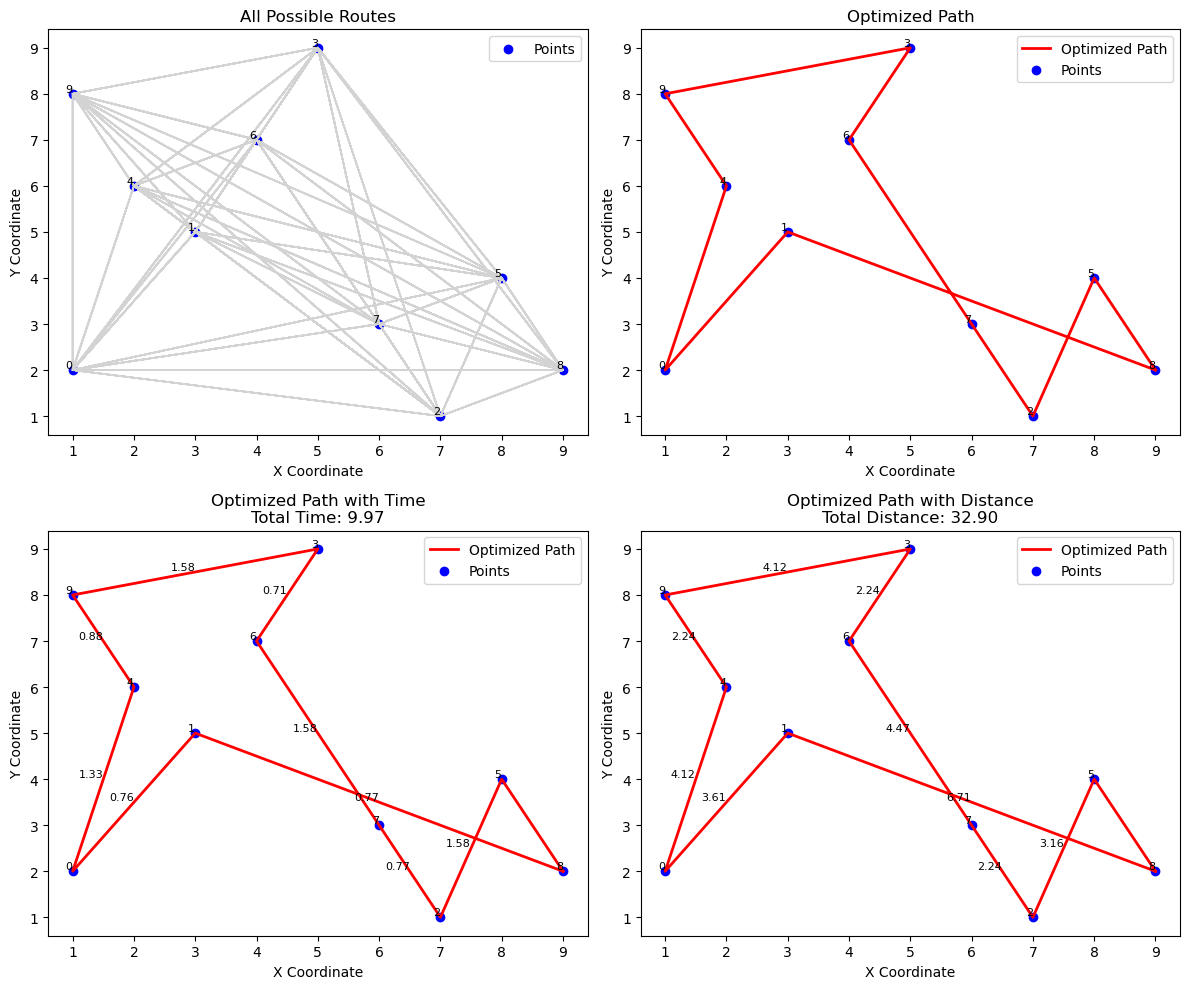

In [23]:
def print_and_plot_routes(points, routes, optimized_route):
    # Initialize subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Plot all possible routes
    ax1 = axes[0, 0]
    for route in routes:
        route_x = [points[i].x for i in route + [route[0]]]
        route_y = [points[i].y for i in route + [route[0]]]
        ax1.plot(route_x, route_y, color='lightgray', linestyle='-', linewidth=1)
    ax1.scatter([point.x for point in points], [point.y for point in points], color='blue', label='Points')
    for i, point in enumerate(points):
        ax1.text(point.x, point.y, f'{i}', fontsize=8, ha='right', va='bottom')
    ax1.set_title('All Possible Routes')

    # Plot optimized route
    ax2 = axes[0, 1]
    optimized_x = [points[i].x for i in optimized_route + [optimized_route[0]]]
    optimized_y = [points[i].y for i in optimized_route + [optimized_route[0]]]
    ax2.plot(optimized_x, optimized_y, color='red', linestyle='-', linewidth=2, label='Optimized Path')
    ax2.scatter([point.x for point in points], [point.y for point in points], color='blue', label='Points')
    for i, point in enumerate(points):
        ax2.text(point.x, point.y, f'{i}', fontsize=8, ha='right', va='bottom')
    ax2.set_title('Optimized Path')

    # Plot optimized route with time
    ax3 = axes[1, 0]
    total_time = 0
    order_of_visits_time = []
    for i in range(len(optimized_route) - 1):
        p1 = points[optimized_route[i]]
        p2 = points[optimized_route[i + 1]]
        time_value = get_travel_time(p1, p2)
        total_time += time_value
        center_x = (p1.x + p2.x) / 2
        center_y = (p1.y + p2.y) / 2
        ax3.text(center_x, center_y, f'{time_value:.2f}', fontsize=8, ha='right', va='bottom')
        order_of_visits_time.append(f"Point {optimized_route[i]}")
    ax3.plot(optimized_x, optimized_y, color='red', linestyle='-', linewidth=2, label='Optimized Path')
    ax3.scatter([point.x for point in points], [point.y for point in points], color='blue', label='Points')
    for i, point in enumerate(points):
        ax3.text(point.x, point.y, f'{i}', fontsize=8, ha='right', va='bottom')
    ax3.set_title(f'Optimized Path with Time\nTotal Time: {total_time:.2f}')

    # Plot optimized route with distance
    ax4 = axes[1, 1]
    total_distance = 0
    order_of_visits_distance = []
    for i in range(len(optimized_route) - 1):
        p1 = points[optimized_route[i]]
        p2 = points[optimized_route[i + 1]]
        distance_value = distance(p1, p2)
        total_distance += distance_value
        center_x = (p1.x + p2.x) / 2
        center_y = (p1.y + p2.y) / 2
        ax4.text(center_x, center_y, f'{distance_value:.2f}', fontsize=8, ha='right', va='bottom')
        order_of_visits_distance.append(f"Point {optimized_route[i]}")
    ax4.plot(optimized_x, optimized_y, color='red', linestyle='-', linewidth=2, label='Optimized Path')
    ax4.scatter([point.x for point in points], [point.y for point in points], color='blue', label='Points')
    for i, point in enumerate(points):
        ax4.text(point.x, point.y, f'{i}', fontsize=8, ha='right', va='bottom')
    ax4.set_title(f'Optimized Path with Distance\nTotal Distance: {total_distance:.2f}')

    # Print details
    print("Order of visits (Time):", " -> ".join(order_of_visits_time))
    print("Total time:", total_time)

    print("Order of visits (Distance):", " -> ".join(order_of_visits_distance))
    print("Total distance:", total_distance)

    # Set common labels and legend
    for ax in axes.flatten():
        ax.set_xlabel('X Coordinate')
        ax.set_ylabel('Y Coordinate')
        ax.legend()

    plt.tight_layout()
    plt.show()

# Example usage with around 10 points
points = [
    Point(1, 2), Point(3, 5), Point(7, 1), Point(5, 9),
    Point(2, 6), Point(8, 4), Point(4, 7), Point(6, 3),
    Point(9, 2), Point(1, 8)
]

# Set parameters
population_size = 100
generations = 50
mutation_rate = 0.1

# Run genetic algorithm
initial_routes = generate_population(points, population_size)
best_route = genetic_algorithm(points, population_size, generations, mutation_rate)

# Print details and plot four separate graphs
print_and_plot_routes(points, initial_routes, best_route)
